<a href="https://colab.research.google.com/github/davidpedem/davidpedem/blob/main/seminario_sesion3_clase2_ejemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Máster de Procesamiento de Lenguaje e Inteligencia Artificial.
# Seminario de Computación y Programación.
# Sesión 3.
#David Peña de Miguel

El objetivo es conocer y convertir archivos entre distintos formatos.

**Glosario de términos de la práctica:** HTML, CSV, UTF-8, JSON, XLSX

### Archivo HTML

Los datos pueden venirnos en distintos formatos: HTML, texto formateado (programas específicos Word, Excel…), CSV, JSON, Base de datos relacional. Es posible pasar de un formato a otro utilizando herramientas específicas de transformación de datos (que puedes descargarte y utilizar como Pandoc), sistemas web como https://www.convertcsv.com o a través de lenguajes de programación (como Python).

```
<!DOCTYPE html>
<html>
  <head>
  <head>
  <meta name= “Tu nombre”; content="text/html; charset=utf-8">
  </head>
  <body>
<table>
  <tr>
    <th>Color (gama)</th>
    <th>Hexadecimal</th>
    <th>RGB</th>
    <th>CMYK</th>
    <th>HSL</th>
  </tr>
  <tr>
    <td>verde</td>
    <td>#7ADF7B</td>
    <td>(122,223,123)</td>
    <td>(45,0,45,13)</td>
    <td>(120.6,61.2%,67.6%)</td>
  </tr>
  <tr>
    <td>azul</td>
    <td>#071875</td>
    <td>(7,24,117)</td>
    <td>(94,79,0,54)</td>
    <td>(230.7,88.7%,24.3%)</td>
  </tr>
  <tr>
    <td>amarillo</td>
    <td>#F6F6A3</td>
    <td>(246,246,163)</td>
    <td>(0,0,34,4)</td>
    <td>(60,82.2%,80.2%)</td>
  </tr>
  <tr>
    <td>rojo</td>
    <td>#E15B27</td>
    <td>(225,91,39)</td>
    <td>(0,60,83,12)</td>
    <td>(16.8,75.6%,51.8%)</td>
  </tr>
  <tr>
    <td>añil</td>
    <td>#1C4C96</td>
    <td>((28, 76, 150))</td>
    <td>(81,49,0,41)</td>
    <td>(216.4,68.5%,34.9%)</td>
  </tr>
</table>
 </body>
</html>

```

### Crear un archivo HTML

Abre Sublime Text (también puedes hacerlo con otro editor de texto que tengas instalado en tu equipo) y copia y pega el código anterior.

Modifica dónde pone "Tu nombre" y escribe tu nombre.

Guárdalo en el escritorio de tu ordenador con el nombre MiTablaColores.html y en codificación “UTF-8”.

Abre el fichero con un navegador y observa el resultado de tu página web.

### Leer un archivo HTML
Queremos trabajar con la información que hay en el documento HTML, para ello vamos a leerlo usando Python.

Sube el archivo que has creado (MiTablaColores.html) a la pestaña de archivos.

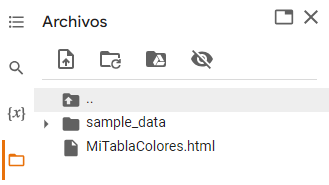

Para poder trabajar con el archivo es necesario cargar librerías para poder hacer uso de ellas.

In [1]:
# vamos a empezar con la programación en python
# Importar librerías
import pandas as pd

Lee el archivo HTML y lo almacenamos en la variable `tablas`.

In [2]:
tablas = pd.read_html('MiTablaColores.html')

Podemos ver que tiene almacenado la variable `tablas` si simplemente la escribimos y ejecutamos.

In [3]:
tablas

[  Color (gama) Hexadecimal              RGB          CMYK                  HSL
 0        verde     #7ADF7B    (122,223,123)  (45,0,45,13)  (120.6,61.2%,67.6%)
 1         azul     #071875       (7,24,117)  (94,79,0,54)  (230.7,88.7%,24.3%)
 2     amarillo     #F6F6A3    (246,246,163)    (0,0,34,4)     (60,82.2%,80.2%)
 3         rojo     #E15B27      (225,91,39)  (0,60,83,12)   (16.8,75.6%,51.8%)
 4        aÃ±il     #1C4C96  ((28, 76, 150))  (81,49,0,41)  (216.4,68.5%,34.9%)]

Observa que hay un problema con la codificación. El archivo HTML lo has almacenado en UTF-8 pero al leer el archivo no lo ha leído con esta codificación. Hay que especificarle explícitamente la codificación del fichero.
Ejecutamos la siguiente instrucción.

In [4]:
tablas = pd.read_html('MiTablaColores.html', encoding='utf-8')

Comprobamos que en la variable tablas, ahora sí, se encuentra la información sin problemas de codificación.

In [5]:
tablas


[  Color (gama) Hexadecimal              RGB          CMYK                  HSL
 0        verde     #7ADF7B    (122,223,123)  (45,0,45,13)  (120.6,61.2%,67.6%)
 1         azul     #071875       (7,24,117)  (94,79,0,54)  (230.7,88.7%,24.3%)
 2     amarillo     #F6F6A3    (246,246,163)    (0,0,34,4)     (60,82.2%,80.2%)
 3         rojo     #E15B27      (225,91,39)  (0,60,83,12)   (16.8,75.6%,51.8%)
 4         añil     #1C4C96  ((28, 76, 150))  (81,49,0,41)  (216.4,68.5%,34.9%)]

### Convertir HTML a XLSX
Ahora vamos a convertir la tabla del fichero HTML anterior a un fichero de tipo hoja de cálculo como puede ser Excel, hay varias formas de hacerlo, entre ellas desde el propio editor de hojas de cálculo.

En este caso vamos a usar Python para convertir el formato del fichero.

Una vez leído el archivo HTML, éste puede tener una o varias tablas.

Para generar un archivo con extensión .xlsx (Excel) con la información de la primera tabla, ejecutamos la siguiente instrucción. En nuestro caso sólo hay una tabla, pero si hubiera más sería cambiar el `0` por el valor que ocupa la posición de la tabla menos 1 (por ejemplo para la quinta tabla hay que poner un 4).



In [6]:
tablas[0].to_excel ('MiTablaColores.xlsx', index = None, header=True)

En la pestaña "Archivos", se ha generado un archivo .xlsx. Si no aparece, clica con el botón derecho en el espacio dónde aparecen los archivos y haz clic en la opción "Actualizar".

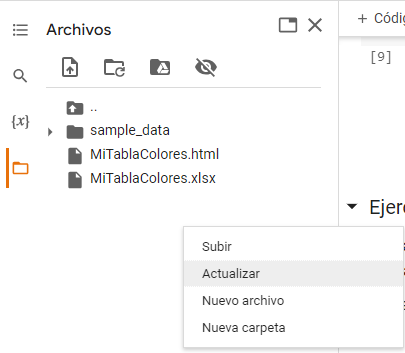

RESPUESTA: Descarga el archivo .xlsx generado, ábrelo con un editor de hojas de cálculo y haz una captura de pantalla e insértala aquí.


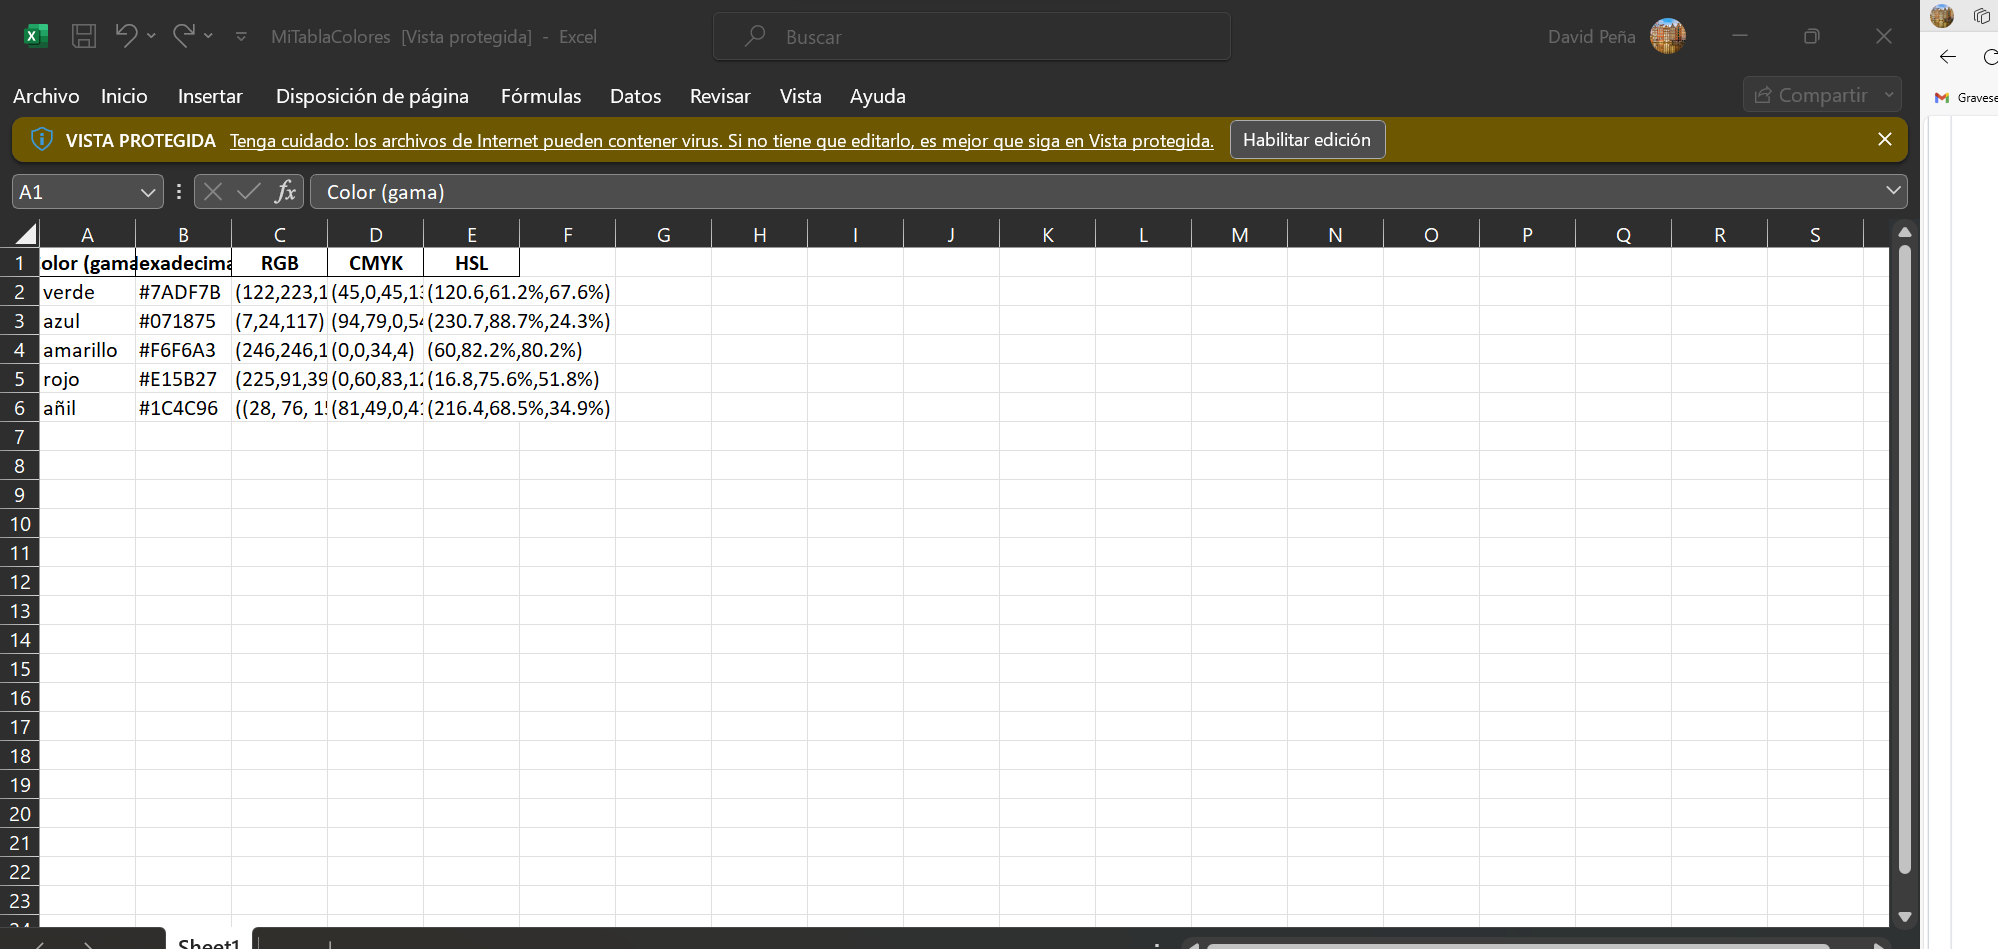

### Convertir de HTML a CSV
Otro de los formatos en los que nos puede interesar trabajar es el formato CSV.
Vamos a recuperar la información del archivo HTML en formato CSV.

Utilizamos la variable tablas que ya contiene la información del archivo .html y ejecutamos la siguiente instrucción para obtener el fichero CSV.

In [7]:
tablas[0].to_csv('MiTablaColores.csv')

RESPUESTA: Haz doble clic en el fichero que se ha generado. Se abrirá en el lado derecho de tu navegador. Haz una captura de pantalla e insértala aquí.

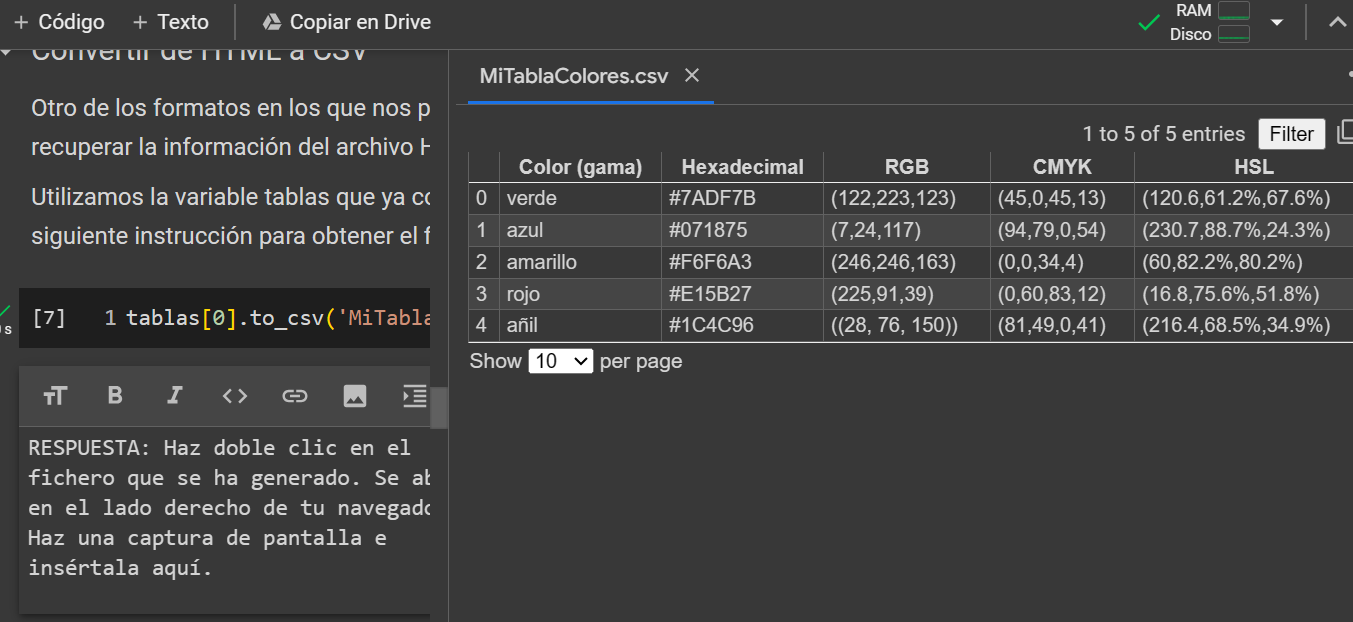

### Convertir CSV a Base de Datos
Es posible que la cantidad de datos se mayor y queramos disponerlos en una base de datos.

Para ello vamos a usar SQLite que se utiliza para trabajar con bases de datos relacionales.

In [8]:
# Importar librerías
import sqlite3

Lo primero es leer el archivo .csv, para ello ejecutamos la siguiente instrucción.

In [9]:
dfTablas = pd.read_csv('MiTablaColores.csv')

RESPUESTA: Escribe el nombre de la variable donde se ha almacenado la información del archivo para comprobar que se ha leído correctamente.

In [10]:
dfTablas


,Unnamed: 0,Color (gama),Hexadecimal,RGB,CMYK,HSL
0,0,verde,#7ADF7B,"(122,223,123)","(45,0,45,13)","(120.6,61.2%,67.6%)"
1,1,azul,#071875,"(7,24,117)","(94,79,0,54)","(230.7,88.7%,24.3%)"
2,2,amarillo,#F6F6A3,"(246,246,163)","(0,0,34,4)","(60,82.2%,80.2%)"
3,3,rojo,#E15B27,"(225,91,39)","(0,60,83,12)","(16.8,75.6%,51.8%)"
4,4,añil,#1C4C96,"((28, 76, 150))","(81,49,0,41)","(216.4,68.5%,34.9%)"


A continuación abrimos la conexión y creamos la base de datos dónde se van a guardar los datos, en este caso la llamamos "MiBDColores".

In [11]:
conn = sqlite3.connect('MiBDColores.db')

Observa que se ha creado un nuevo fichero con ese nombre y extensión .db.

Ahora escribimos la información del fichero CSV dentro de la base de datos que hemos creado. Para ello creamos una tabla que se denomina `colores`que es la que almacena la información.

In [12]:
dfTablas.to_sql('colores', conn, if_exists='replace', index=False)

5

Lo último es cerrar la conexión con la base de datos.

In [13]:
conn.close()

De esta manera ya podríamos trabajar con la base de datos, haciendo consultas sobre ella. Por ejemplo, en este pequeño ejercicio nuestra base de datos sólo tiene una tabla (la cual se denomina `tiempo`) si queremos saber toda la información que tiene sería de la siguiente manera.

In [14]:
conn = sqlite3.connect('MiBDColores.db') # abrir conexión con la base de datos

In [15]:
pd.read_sql_query("SELECT * FROM colores", conn)

,Unnamed: 0,Color (gama),Hexadecimal,RGB,CMYK,HSL
0,0,verde,#7ADF7B,"(122,223,123)","(45,0,45,13)","(120.6,61.2%,67.6%)"
1,1,azul,#071875,"(7,24,117)","(94,79,0,54)","(230.7,88.7%,24.3%)"
2,2,amarillo,#F6F6A3,"(246,246,163)","(0,0,34,4)","(60,82.2%,80.2%)"
3,3,rojo,#E15B27,"(225,91,39)","(0,60,83,12)","(16.8,75.6%,51.8%)"
4,4,añil,#1C4C96,"((28, 76, 150))","(81,49,0,41)","(216.4,68.5%,34.9%)"


Si lo que queremos es obtener toda la información para un determinado código de color en hexadecimal, la consulta que haremos es la siguiente:

In [16]:
#Completa
pd.read_sql_query("SELECT * FROM colores WHERE (((Hexadecimal)= '#7ADF7B'))", conn)

,Unnamed: 0,Color (gama),Hexadecimal,RGB,CMYK,HSL
0,0,verde,#7ADF7B,"(122,223,123)","(45,0,45,13)","(120.6,61.2%,67.6%)"


In [17]:
#para finalizar, se cierra la conexión con la base de datos
conn.close()

### Convertir de CSV a JSON

Volvemos a leer el fichero CSV y almacenarlo en la variable `df`.

In [18]:
df = pd.read_csv('MiTablaColores.csv')

La siguiente instrucción convierte la información almacenada en `df` en un archivo JSON.

In [19]:
df.to_json("MiTablaColores.json", orient = "records")

Hacemos doble clic en el archivo JSON generado.

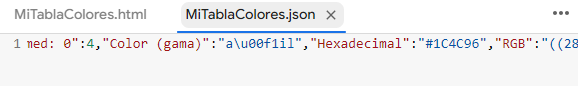

Como se puede apreciar hay un problema en la codificación de la información a la hora de crear el archivo JSON, para evitarlo, hay que ejecutar la siguiente instrucción, indicando la codificación.

In [20]:
with open("MiTablaColores.json", 'w', encoding='utf-8') as file:
    df.to_json(file, force_ascii=False, orient="records")

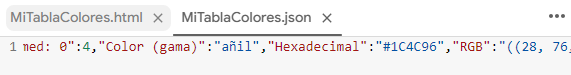

Esta es mi captura después de corregirlo:
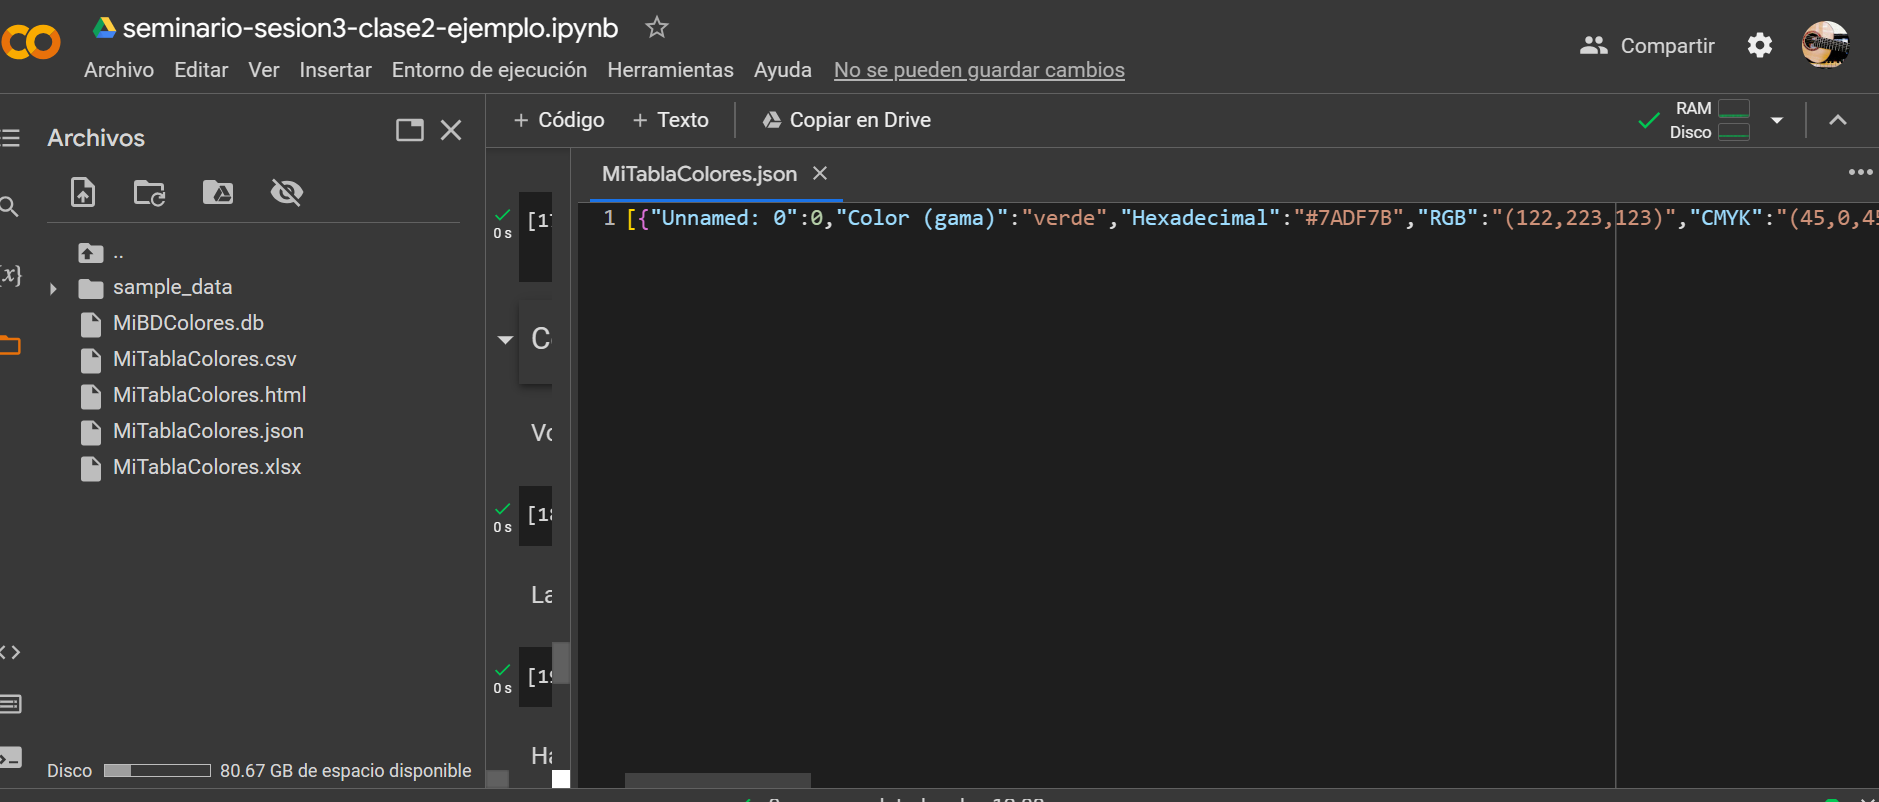

esto es la captura de pantalla:

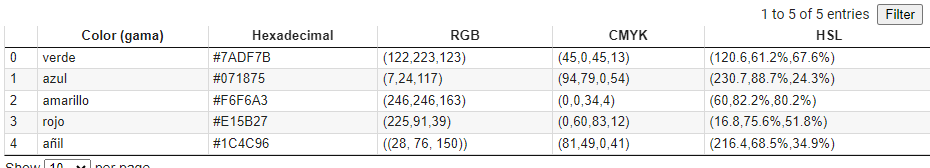